In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [ ]:
df=pd.read_csv(r"/content/Book11.csv")

**Data pre processing**

In [ ]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [ ]:

df.isnull().sum()

,0
Formatted Date,0
Summary,0
Precip Type,0
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0


In [ ]:

df['Formatted Date'] = pd.to_datetime(df['Formatted Date'],errors='coerce', utc=True)
df


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
14610,2007-03-09 18:00:00+00:00,Clear,rain,9.027778,7.511111,0.89,9.8693,315,8.0983,0,1023.24,Mostly cloudy until afternoon.
14611,2007-03-09 19:00:00+00:00,Mostly Cloudy,rain,8.866667,7.422222,0.89,9.3058,313,9.6761,0,1023.39,Mostly cloudy until afternoon.
14612,2007-03-09 20:00:00+00:00,Overcast,rain,8.844444,8.027778,0.93,6.4722,314,7.8729,0,1023.68,Mostly cloudy until afternoon.
14613,2007-03-09 21:00:00+00:00,Overcast,rain,8.850000,7.172222,0.93,10.5616,325,8.1788,0,1023.49,Mostly cloudy until afternoon.


In [ ]:
df['Precip Type'].fillna(method='ffill', inplace=True)
df.fillna(method='ffill', inplace=True)
df

<ipython-input-6-7366af04142b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Precip Type'].fillna(method='ffill', inplace=True)
<ipython-input-6-7366af04142b>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Precip Type'].fillna(method='ffill', inplace=True)
<ipython-input-6-7366af04142b>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  d

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
14610,2007-03-09 18:00:00+00:00,Clear,rain,9.027778,7.511111,0.89,9.8693,315,8.0983,0,1023.24,Mostly cloudy until afternoon.
14611,2007-03-09 19:00:00+00:00,Mostly Cloudy,rain,8.866667,7.422222,0.89,9.3058,313,9.6761,0,1023.39,Mostly cloudy until afternoon.
14612,2007-03-09 20:00:00+00:00,Overcast,rain,8.844444,8.027778,0.93,6.4722,314,7.8729,0,1023.68,Mostly cloudy until afternoon.
14613,2007-03-09 21:00:00+00:00,Overcast,rain,8.850000,7.172222,0.93,10.5616,325,8.1788,0,1023.49,Mostly cloudy until afternoon.


In [ ]:

df.duplicated().sum()

0

In [ ]:
df.drop(['Loud Cover'], axis=1, inplace=True)


In [ ]:

numerical_columns = [
    'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
    'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)'
]

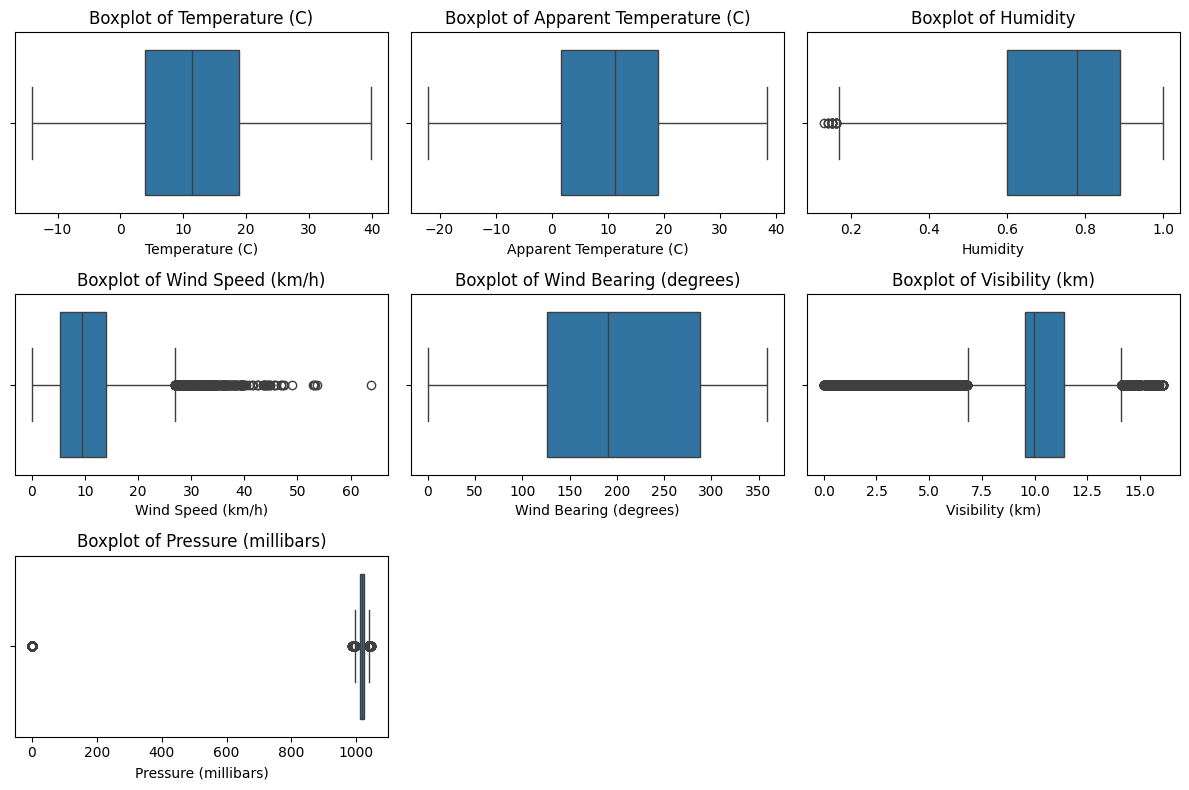

In [ ]:
#outliers
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [ ]:
# Define the function to remove outliers using the IQR method
def remove_outliers_iqr(df, columns):
   df_cleaned = df.copy()
   for column in columns:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Clip values outside the bounds
        df_cleaned[column] = df_cleaned[column].clip(lower=lower_bound, upper=upper_bound)

        # Print number of outliers handled
        num_outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
        print(f"{column}: {num_outliers} outliers handled.")
        return df_cleaned

In [ ]:
selected_columns = [ 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']
data_selected = df[selected_columns]

In [ ]:
# Remove outliers using the IQR method
data_cleaned = remove_outliers_iqr(data_selected, selected_columns)

Humidity: 17 outliers handled.


In [ ]:
# Display before and after statistics
print("\n--- Original Data Statistics ---")
print(df.describe())

print("\n--- Cleaned Data Statistics ---")
print(data_cleaned.describe())


--- Original Data Statistics ---
       Temperature (C)  Apparent Temperature (C)      Humidity  \
count     14615.000000              14615.000000  14615.000000   
mean         11.701923                 10.611096      0.730402   
std           9.919081                 11.008374      0.195268   
min         -14.088889                -22.094444      0.130000   
25%           3.866667                  1.580556      0.600000   
50%          11.338889                 11.338889      0.780000   
75%          18.916667                 18.916667      0.890000   
max          39.905556                 38.377778      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
count       14615.000000            14615.000000      14615.00000   
mean           10.455786              191.837906         10.06639   
std             6.834848              104.843021          3.82091   
min             0.000000                0.000000          0.00000   
25%             5.248600  

In [ ]:
# Drop Irrelevant Columns
columns_to_drop = ['Partly cloud', 'Loud Cover', 'Precip Type', 'Summary', 'Daily Summary']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
df.head()


,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006-03-31 22:00:00+00:00,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
1,2006-03-31 23:00:00+00:00,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,2006-04-01 00:00:00+00:00,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,2006-04-01 01:00:00+00:00,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,2006-04-01 02:00:00+00:00,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51


In [ ]:
correlation_matrix = df.corr()

# Extract correlations with Temperature (C)
temperature_correlations = correlation_matrix['Temperature (C)']

# Display the correlation values
print(temperature_correlations)

Formatted Date              0.162425
Temperature (C)             1.000000
Apparent Temperature (C)    0.992659
Humidity                   -0.659856
Wind Speed (km/h)           0.026569
Wind Bearing (degrees)      0.030141
Visibility (km)             0.358762
Pressure (millibars)       -0.074354
Name: Temperature (C), dtype: float64


In [ ]:
feature = 'Humidity'  # Choose the feature column for univariate analysis
target = 'Temperature (C)'


In [ ]:
# Select the independent variable (humidity) and target variable (temperature)
data = df[['Humidity', 'Temperature (C)']]

In [ ]:
X = df[[feature]].values
y = df[target].values

In [ ]:
# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [ ]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length, 0])  # Use only the first column (Humidity)
        y.append(data[i + sequence_length, 1])  # Use the second column (Temperature) as the target
    return np.array(X), np.array(y)


In [ ]:
sequence_length = 24  # Use past 24 hours to predict the next temperature
X, y = create_sequences(scaled_data, sequence_length)

# Reshape X to be [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
# Print the shape of X and y
print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (14591, 24, 1)
Shape of target (y): (14591,)


**Vanilla LSTM Model**

In [ ]:
def build_vanilla_lstm_model(input_shape):
    model = Sequential([
        LSTM(units=50, activation='relu', input_shape=input_shape),
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

In [ ]:
# Build the model
vanilla_lstm_model = build_vanilla_lstm_model((X_train.shape[1], X_train.shape[2]))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

# Define early stopping and learning rate scheduler
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=8,  # Increase patience to allow better generalization
    restore_best_weights=True
)

In [ ]:
history = vanilla_lstm_model.fit(
    X_train, y_train,
    epochs=30,  # Adjust epochs as needed
    batch_size=32,  # Adjust batch size as needed
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0783 - mae: 0.2170 - val_loss: 0.0183 - val_mae: 0.1125
Epoch 2/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0202 - mae: 0.1134 - val_loss: 0.0130 - val_mae: 0.0931
Epoch 3/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0186 - mae: 0.1084 - val_loss: 0.0113 - val_mae: 0.0887
Epoch 4/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0181 - mae: 0.1072 - val_loss: 0.0111 - val_mae: 0.0895
Epoch 5/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0174 - mae: 0.1045 - val_loss: 0.0117 - val_mae: 0.0918
Epoch 6/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0175 - mae: 0.1059 - val_loss: 0.0114 - val_mae: 0.0892
Epoch 7/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0169 - mae: 0.1036 - val_loss: 0.0115 - val_mae: 0.0900
Epoch 8/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0159 - mae: 0.1004 - val_loss: 0.0112 - val_mae: 0.0883
Epoch 9/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/

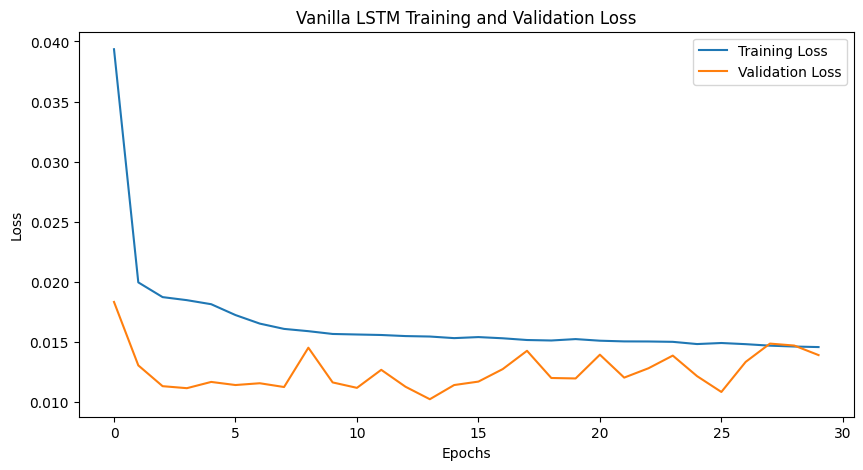

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Vanilla LSTM Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
y_pred = vanilla_lstm_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Vanilla LSTM - Mean Squared Error (MSE): {mse:.2f}")
print(f"Vanilla LSTM - Mean Absolute Error (MAE): {mae:.2f}")

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Vanilla LSTM - Mean Squared Error (MSE): 0.01
Vanilla LSTM - Mean Absolute Error (MAE): 0.10


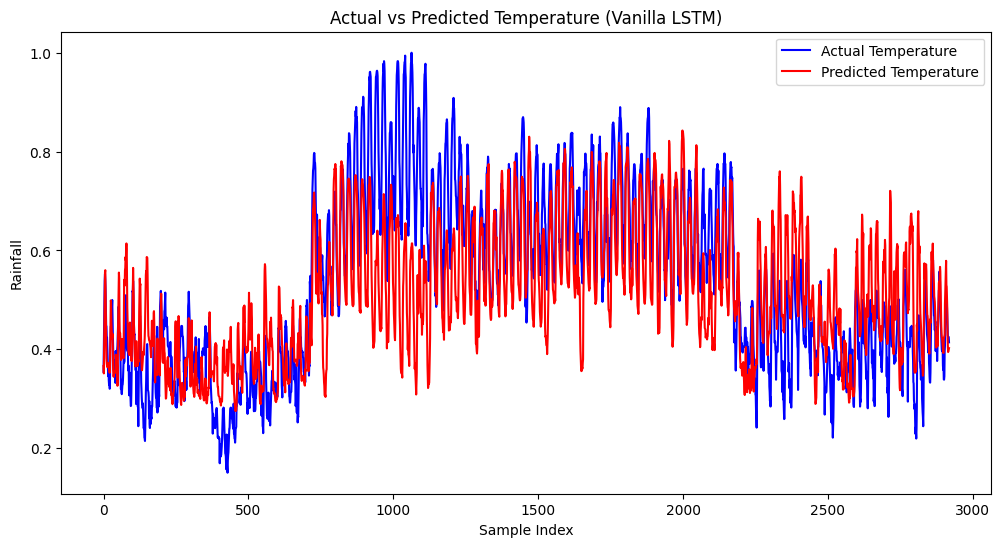

In [ ]:
# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Temperature', color='blue')
plt.plot(y_pred, label='Predicted Temperature', color='red')
plt.title('Actual vs Predicted Temperature (Vanilla LSTM)')
plt.xlabel('Sample Index')
plt.ylabel('Rainfall')
plt.legend()
plt.show()

**Stacked LSTM Model**

In [ ]:
# Define the Stacked LSTM Model
def build_stacked_lstm_model(input_shape):

    model = Sequential([
        LSTM(50, activation='relu', return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50, activation='relu', return_sequences=True),
        Dropout(0.2),
        LSTM(50, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')
    return model


In [ ]:
# Reshape input for LSTM (samples, timesteps, features)
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Build and summarize the model
input_shape_stacked = (X_train_reshaped.shape[1], X_train_reshaped.shape[2])
stacked_lstm_model = build_stacked_lstm_model(input_shape_stacked)
stacked_lstm_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 24, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 24, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 24, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Define early stopping and learning rate scheduler
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=8,  # Increase patience to allow better generalization
    restore_best_weights=True
)

In [ ]:
# Train the model
history = stacked_lstm_model.fit(
    X_train_reshaped, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_reshaped, y_test),
    verbose=1
)

Epoch 1/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - loss: 0.0602 - val_loss: 0.0142
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - loss: 0.0219 - val_loss: 0.0130
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - loss: 0.0195 - val_loss: 0.0166
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - loss: 0.0188 - val_loss: 0.0172
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - loss: 0.0177 - val_loss: 0.0130
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - loss: 0.0174 - val_loss: 0.0132
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - loss: 0.0168 - val_loss: 0.0138
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - loss: 0.0163 - val_loss: 0.0132
Epoch 9/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - loss: 0.0151 - val_loss: 0.0143
Epoch 10/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - loss: 0.0156 - val_loss: 0.0135
Epoch 11/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - loss: 0.0150 - val_loss: 0.0130
Epoch 12/50
438/438 ━━━━━━━━━━

In [ ]:
# Evaluate the model

y_pred = stacked_lstm_model.predict(X_test_reshaped)

110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


In [ ]:

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²) Score: {r2:.2f}")

Mean Absolute Error (MAE): 0.10
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.13
R-squared (R²) Score: 0.03


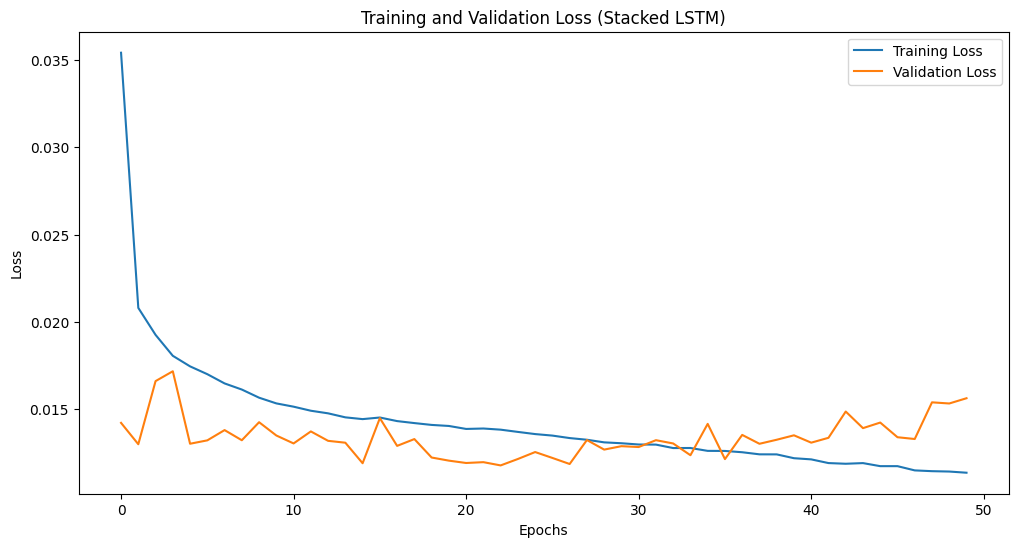

In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Stacked LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

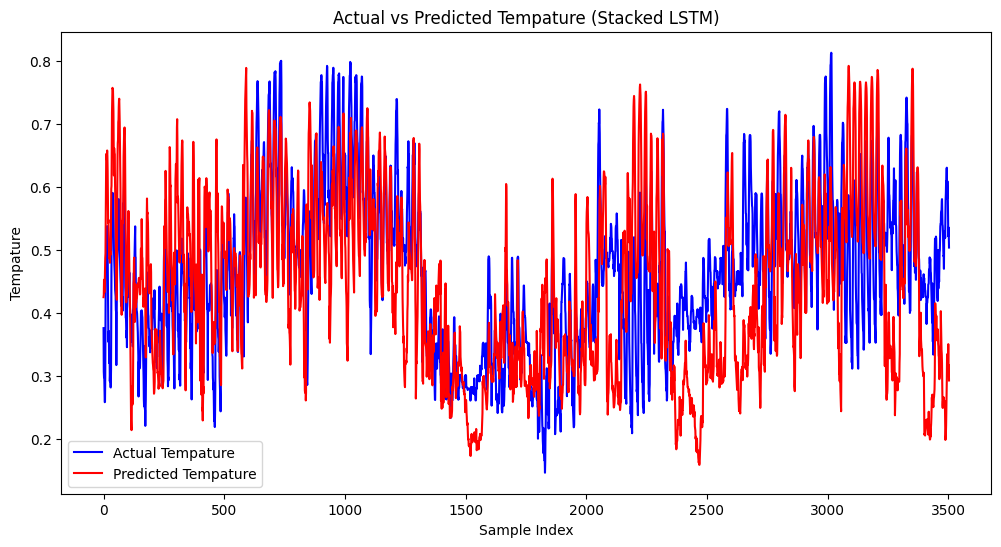

In [ ]:
# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Tempature', color='blue')
plt.plot(y_pred, label='Predicted Tempature', color='red')
plt.title('Actual vs Predicted Tempature (Stacked LSTM)')
plt.xlabel('Sample Index')
plt.ylabel('Tempature')
plt.legend()
plt.show()


**Bidirectional LSTM Model**

In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint,TensorBoard
import tensorflow as tf
from keras.models import Sequential
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau



In [ ]:
# Reshape y_train and y_test to (n_samples, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Reshape X_train and X_test if necessary (for a single feature per timestep)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Assuming 1 feature per timestep
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)      # Assuming 1


In [ ]:
# Define the model
model = Sequential()

# First Bidirectional LSTM Layer with L2 Regularization, Dropout, and BatchNormalization
model.add(Bidirectional(LSTM(50, return_sequences=True, kernel_regularizer=l2(0.05)),
                        input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))  # Increased dropout rate
model.add(BatchNormalization())  # Batch Normalization to stabilize training

# Second Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(50, return_sequences=False, kernel_regularizer=l2(0.05))))

# Output layer
model.add(Dense(1))  # Adjust this for classification


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

In [ ]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 24, 100)             │          20,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 24, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 24, 100)             │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 100)                 │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,701 (319.14 KB)

 Trainable params: 81,501 (318.36 KB)

 Non-trainable params: 200 (800.00 B)

In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, save_weights_only=False)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

In [ ]:
 #Model Checkpoint to save the best model
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, checkpoint, lr_scheduler, tensorboard_callback]
)

Epoch 1/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - loss: 4.4021 - mae: 0.1392 - val_loss: 0.0448 - val_mae: 0.1595 - learning_rate: 0.0010
Epoch 2/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - loss: 0.0246 - mae: 0.1193 - val_loss: 0.0174 - val_mae: 0.1008 - learning_rate: 0.0010
Epoch 3/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 24s 62ms/step - loss: 0.0241 - mae: 0.1203 - val_loss: 0.0153 - val_mae: 0.0968 - learning_rate: 0.0010
Epoch 4/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 40s 59ms/step - loss: 0.0230 - mae: 0.1185 - val_loss: 0.0140 - val_mae: 0.0951 - learning_rate: 0.0010
Epoch 5/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - loss: 0.0227 - mae: 0.1173 - val_loss: 0.0182 - val_mae: 0.1064 - learning_rate: 0.0010
Epoch 6/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - loss: 0.0192 - mae: 0.1074 - val_loss: 0.0142 - val_mae: 0.0951 - learning_rate: 0.0010
Epoch 7/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - loss: 0.0189 - mae: 0.1068 - val_loss: 0.0131 - val_mae: 0.0906 - learning_rate:

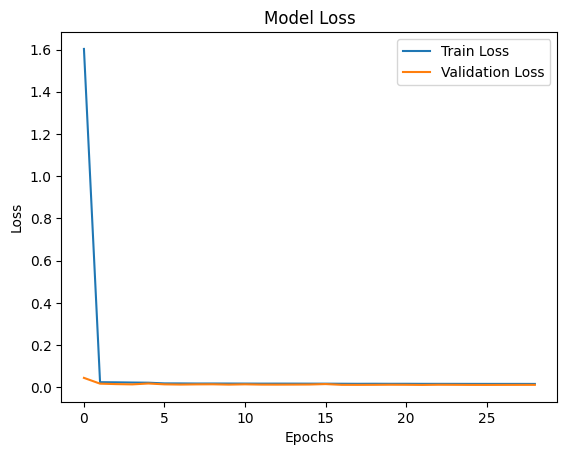

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
y_pred =model.predict(X_test)

92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step


In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²) Score: {r2:.2f}")


92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step
Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.10
R-squared (R²) Score: 0.66


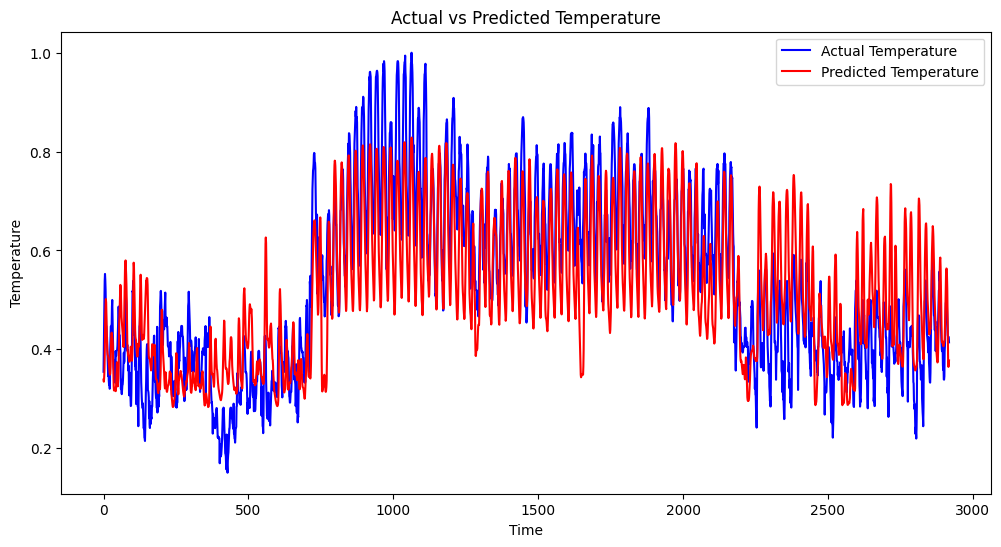

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Temperature', color='blue')
plt.plot(y_pred, label='Predicted Temperature', color='red')
plt.title('Actual vs Predicted Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

**CNN LSTM Model**

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout,ConvLSTM2D
from tensorflow.keras.optimizers import Adam

In [ ]:
# Reshaping the input data to (samples, time_steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # Reshape to (None, 24, 1)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))  # Reshape to (None, 24, 1)


In [ ]:
# Define the model
model = Sequential()

# Convolutional layer with BatchNormalization and Dropout
model.add(Conv1D(filters=64, kernel_size=3, activation='relu',
                 kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# Second Convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# Flatten the output for fully connected layers
model.add(Flatten())

# Fully connected layer with L2 Regularization
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.4))

# Output layer
model.add(Dense(1, activation='linear'))


In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Summary of the model
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)                    │ (None, 22, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 22, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ (None, 11, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 11, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 9, 32)               │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 9, 32)               │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_9 (MaxPooling1D)       │ (None, 4, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 4, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,457 (91.63 KB)

 Trainable params: 23,265 (90.88 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
# Define Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

In [ ]:
# Train the Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

Epoch 1/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 2.4275 - mae: 0.6955 - val_loss: 1.0558 - val_mae: 0.2723 - learning_rate: 0.0010
Epoch 2/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.9310 - mae: 0.2243 - val_loss: 0.6129 - val_mae: 0.2049 - learning_rate: 0.0010
Epoch 3/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.5141 - mae: 0.1508 - val_loss: 0.3305 - val_mae: 0.1553 - learning_rate: 0.0010
Epoch 4/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2773 - mae: 0.1260 - val_loss: 0.1777 - val_mae: 0.1364 - learning_rate: 0.0010
Epoch 5/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1490 - mae: 0.1190 - val_loss: 0.0983 - val_mae: 0.1277 - learning_rate: 0.0010
Epoch 6/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0821 - mae: 0.1119 - val_loss: 0.0576 - val_mae: 0.1179 - learning_rate: 0.0010
Epoch 7/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0508 - mae: 0.1118 - val_loss: 0.0389 - val_mae: 0.1149 - learning_rate: 0.0010
Epoch

In [ ]:
y_pred = model.predict(X_test)

# Metrics# Reshape y_pred and y_test to 2D if needed
y_pred_reshaped = y_pred.reshape(-1, 1)  # Flatten to (samples, features)
y_test_reshaped = y_test.reshape(-1, 1)



92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:


# Calculate MSE, RMSE, R2
mse = mean_squared_error(y_test_reshaped, y_pred_reshaped)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reshaped, y_pred_reshaped)

# Print metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.010621285752590033
Root Mean Squared Error (RMSE): 0.10305962231926737
R-squared (R2): 0.673519006807793


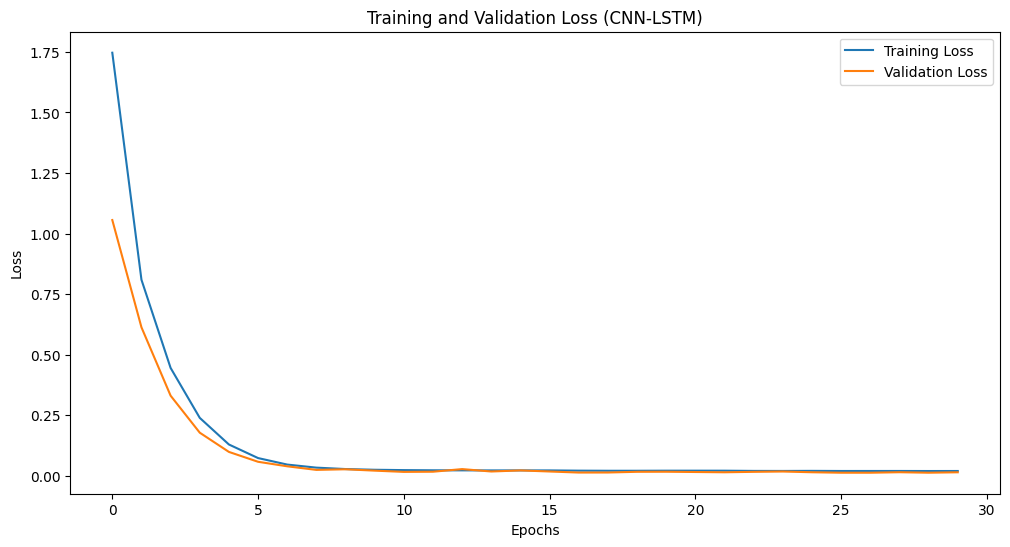

In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (CNN-LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Predict Temperature


# Rescale Predictions and Actual Values
temp_scaler = scaler.scale_[-1]  # Scale factor for the target column
y_test_rescaled = y_test / temp_scaler
y_pred_rescaled = y_pred.flatten() / temp_scaler

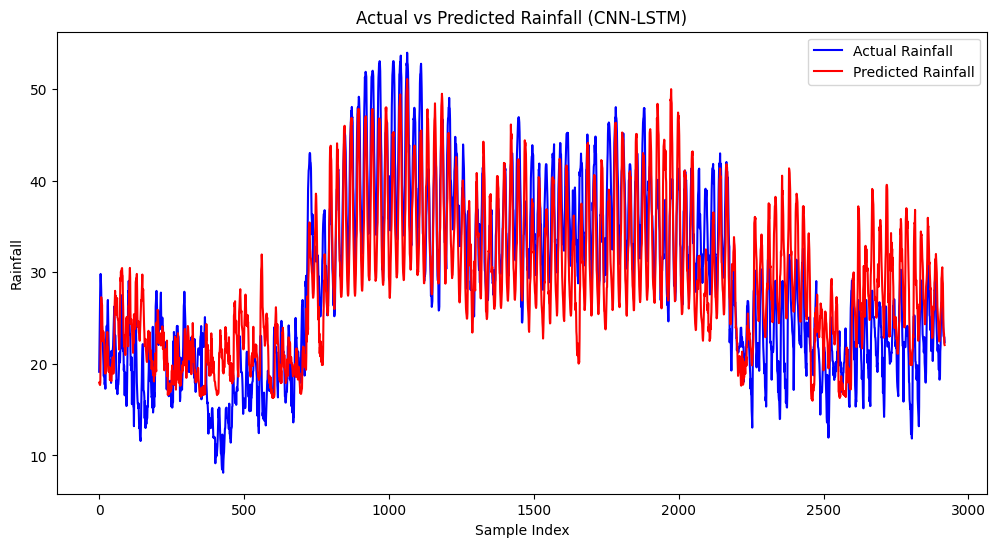

In [ ]:
# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual Rainfall', color='blue')
plt.plot(y_pred_rescaled, label='Predicted Rainfall', color='red')
plt.title('Actual vs Predicted Rainfall (CNN-LSTM)')
plt.xlabel('Sample Index')
plt.ylabel('Rainfall')
plt.legend()
plt.show()

**Convultional LSTM Model**

In [ ]:
from tensorflow.keras.layers import ConvLSTM2D, Flatten, Dense, BatchNormalization, Dropout,Input
from tensorflow.keras.metrics import MeanSquaredError
from tensorflow.keras import regularizers

In [ ]:
# Reshape input data for ConvLSTM (samples, time_steps, rows, cols, channels)
X = X.reshape((X.shape[0], X.shape[1], 1, 1, 1))  # Shape: (samples, time_steps, rows, cols, channels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
# Build the ConvLSTM model with regularization
model = Sequential()

# First ConvLSTM layer with L2 regularization and Dropout to reduce overfitting
model.add(ConvLSTM2D(
    filters=128,  # Increased filters for more feature learning
    kernel_size=(1, 1),  # Kernel size (1, 1) to match small input dimensions
    activation='relu',
    input_shape=(X_train.shape[1], 1, 1, 1),  # Input shape for ConvLSTM
    return_sequences=True,  # Keep the output sequence for the next ConvLSTM layer
    kernel_regularizer=regularizers.l2(0.01)  # L2 regularization on kernel weights
))
model.add(BatchNormalization())  # Batch normalization to help with training
model.add(Dropout(0.3))  # Dropout to prevent overfitting

# Second ConvLSTM layer with L2 regularization and Dropout
model.add(ConvLSTM2D(
    filters=64,  # Reduce filters to allow for better generalization
    kernel_size=(1, 1),  # Kernel size (1, 1)
    activation='relu',
    return_sequences=False,  # Set to False to get a single output after the second layer
    kernel_regularizer=regularizers.l2(0.01)  # L2 regularization
))
model.add(BatchNormalization())  # Batch normalization to help with training
model.add(Dropout(0.3))  # Dropout to prevent overfitting

# Flatten the output and add Dense layers with L2 regularization
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # L2 regularization
model.add(Dropout(0.4))  # Dropout to prevent overfitting
model.add(Dense(1))  # Output layer for regression (univariate prediction)




In [ ]:

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
model.summary()


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv_lstm2d_11 (ConvLSTM2D)          │ (None, 24, 1, 1, 128)       │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 24, 1, 1, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 24, 1, 1, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_lstm2d_12 (ConvLSTM2D)          │ (None, 1, 1, 64)            │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 1, 1, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 125,185 (489.00 KB)

 Trainable params: 124,801 (487.50 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

Epoch 1/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 39s 89ms/step - loss: 1.9108 - mae: 0.4068 - val_loss: 0.5356 - val_mae: 0.1557 - learning_rate: 0.0010
Epoch 2/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 33s 91ms/step - loss: 0.4309 - mae: 0.1603 - val_loss: 0.1965 - val_mae: 0.1250 - learning_rate: 0.0010
Epoch 3/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 40s 88ms/step - loss: 0.1607 - mae: 0.1257 - val_loss: 0.0812 - val_mae: 0.1204 - learning_rate: 0.0010
Epoch 4/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - loss: 0.0689 - mae: 0.1162 - val_loss: 0.0349 - val_mae: 0.0958 - learning_rate: 0.0010
Epoch 5/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 33s 91ms/step - loss: 0.0361 - mae: 0.1113 - val_loss: 0.0252 - val_mae: 0.1077 - learning_rate: 0.0010
Epoch 6/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - loss: 0.0247 - mae: 0.1084 - val_loss: 0.0155 - val_mae: 0.0896 - learning_rate: 0.0010
Epoch 7/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - loss: 0.0212 - mae: 0.1072 - val_loss: 0.0189 - val_mae: 0.1089 - learning_rate:

In [ ]:
# Evaluate the model on the test data
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0102 - mae: 0.0785
Test Loss: 0.011299713514745235, Test MAE: 0.08302491158246994


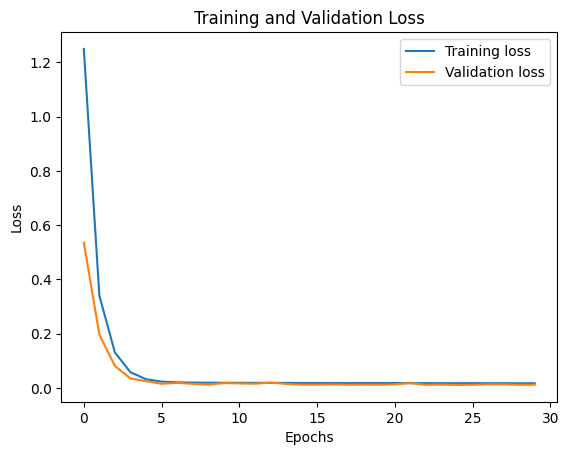

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)


92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step


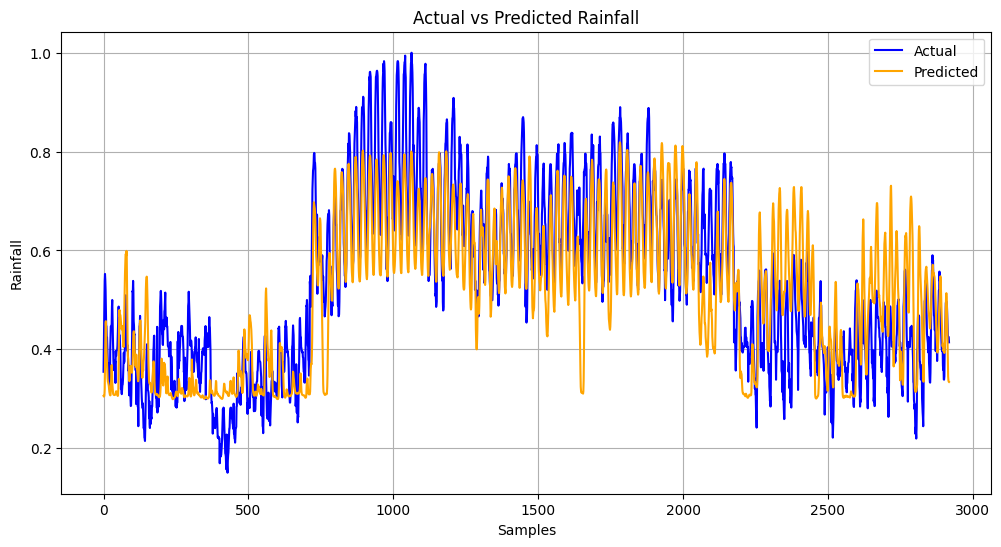

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='orange')
plt.title('Actual vs Predicted Rainfall')
plt.xlabel('Samples')
plt.ylabel('Rainfall')
plt.legend()
plt.grid(True)
plt.show()